In [1]:
import pandas as pd
import glob
import os
import mido
import pretty_midi
import numpy as np
from tqdm.notebook import tqdm # For progress bar

In [ ]:
# Read data
midi_stats_df = pd.read_csv('../data/nesmdb_midi_stats.csv')

midi_stats_df

,file_path,file_name,folder,mido_type,mido_num_tracks,mido_ticks_per_beat,pm_duration_sec,pm_num_instruments,pm_total_notes,pm_avg_notes_per_instrument,...,pm_overall_avg_velocity,pm_avg_note_duration_sec,pm_initial_tempo,pm_num_tempo_changes,pm_num_time_signature_changes,pm_num_key_signature_changes,pm_has_lyrics,pm_num_text_annotations,parse_error_mido,parse_error_pm
0,../data/nesmdb_midi/train/238_MikeTyson_sPunch...,238_MikeTyson_sPunch_Out___11_12WeHaveaNewCham...,train,1,5,22050,7.453605,3.0,67.0,22.333333,...,3.268657,0.262138,120.0,1.0,2.0,0.0,False,0.0,False,False
1,../data/nesmdb_midi/train/108_Famista_90_10_11...,108_Famista_90_10_11Unknown2.mid,train,1,5,22050,25.658798,4.0,482.0,120.500000,...,5.585062,0.091669,120.0,1.0,2.0,0.0,False,0.0,False,False
2,../data/nesmdb_midi/train/134_GanbareGoemon2_0...,134_GanbareGoemon2_07_08Underpass.mid,train,1,5,22050,11.995147,3.0,183.0,61.000000,...,4.344262,0.186256,120.0,1.0,2.0,0.0,False,0.0,False,False
3,../data/nesmdb_midi/train/178_Ironsword_Wizard...,178_Ironsword_Wizards_amp_WarriorsII_12_13Fire...,train,1,5,22050,24.426463,4.0,262.0,65.500000,...,9.083969,0.202986,120.0,1.0,2.0,0.0,False,0.0,False,False
4,../data/nesmdb_midi/train/387_Wizardry_Proving...,387_Wizardry_ProvingGroundsofTheMadOverlord_16...,train,1,5,22050,51.131156,3.0,183.0,61.000000,...,3.524590,0.812176,120.0,1.0,2.0,0.0,False,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,../data/nesmdb_midi/valid/394_Yoshi_sCookie_03...,394_Yoshi_sCookie_03_041PMusicTypeB.mid,valid,1,5,22050,64.294966,4.0,937.0,234.250000,...,7.556030,0.220868,120.0,1.0,2.0,0.0,False,0.0,False,False
5274,../data/nesmdb_midi/valid/369_VS_NinjaJaJaMaru...,369_VS_NinjaJaJaMaru_kun_09_10PerfectStageClea...,valid,1,5,22050,1.822540,2.0,18.0,9.000000,...,10.222222,0.136900,120.0,1.0,2.0,0.0,False,0.0,False,False
5275,../data/nesmdb_midi/valid/079_DoubleDragonIII_...,079_DoubleDragonIII_TheSacredStones_11_12Hiruk...,valid,1,5,22050,27.672608,4.0,851.0,212.750000,...,4.152761,0.095108,120.0,1.0,2.0,0.0,False,0.0,False,False
5276,../data/nesmdb_midi/valid/404_ZippyRace_06_07V...,404_ZippyRace_06_07VivaNY.mid,valid,1,5,22050,8.120159,2.0,47.0,23.500000,...,4.595745,0.292347,120.0,1.0,2.0,0.0,False,0.0,False,False


(array([325., 565., 485., 283., 224., 204., 103., 189., 162., 179., 114.,
        216., 134., 128., 165., 131., 164., 117., 117., 135.,  71., 104.,
        108.,  77.,  59.,  60.,  50.,  40.,  50.,  38.,  26.,  41.,  30.,
         32.,  17.,  22.,  20.,  13.,  15.,  24.,  15.,  13.,  13.,  11.,
          6.,  12.,  10.,   7.,  10.,   6.,  11.,   4.,   6.,   7.,   1.,
          2.,   6.,   2.,   1.,   5.,   2.,   2.,   5.,   0.,   1.,   1.,
          2.,   1.,   3.,   2.,   4.,   0.,   2.,   2.,   1.,   2.,   1.,
          6.,   2.,   3.,   0.,   0.,   2.,   3.,   0.,   1.,   1.,   1.,
          1.,   1.,   1.,   3.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,
          2.]),
 array([8.60770975e-02, 2.34286485e+00, 4.59965261e+00, 6.85644036e+00,
        9.11322812e+00, 1.13700159e+01, 1.36268036e+01, 1.58835914e+01,
        1.81403791e+01, 2.03971669e+01, 2.26539546e+01, 2.49107424e+01,
        2.71675302e+01, 2.94243179e+01, 3.16811057e+01, 3.39378934e+01,
        3.61946812e+01, 3.8451

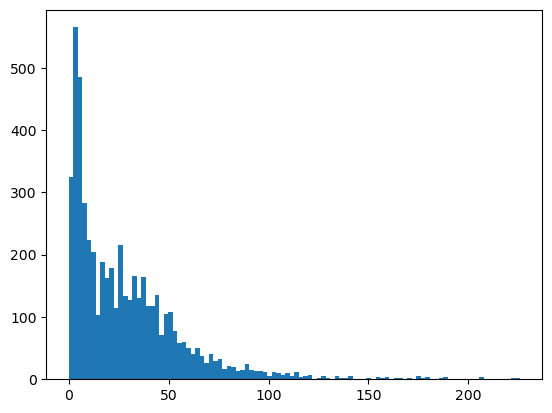

In [3]:
import matplotlib.pyplot as plt

fig = plt.hist(midi_stats_df['pm_duration_sec'], bins=100)
fig

In [ ]:
names_duration = midi_stats_df[midi_stats_df['pm_duration_sec'] > 30][['file_name', 'pm_duration_sec']]
names_duration


,file_name,pm_duration_sec
1,108_Famista_90_10_11Unknown2.mid,25.658798
3,178_Ironsword_Wizards_amp_WarriorsII_12_13Fire...,24.426463
4,387_Wizardry_ProvingGroundsofTheMadOverlord_16...,51.131156
6,195_KonamiWaiWaiWorld_18_19FinalStageBossBGM.mid,34.223560
7,050_ChaosWorld_20_21Chaos.mid,41.132245
...,...,...
5269,166_Hu_ngd__Zhu_l_zh_Zh_n_17_18Ending.mid,36.739615
5270,054_ChukaTaisen_07_08TheUniverseRound6.mid,26.107120
5272,041_Caesar_sPalace_00_01TitleScreen.mid,35.945714
5273,394_Yoshi_sCookie_03_041PMusicTypeB.mid,64.294966


In [ ]:
names_duration.to_csv("../data/all_more_than_30.csv")